# 1 数据预处理 Preprocessing & Impute
## 1.1 数据无量纲化
在梯度和矩阵为核心的算法中，譬如逻辑回归，支持向量机，神经网络，无量纲化可以加快求解速度；而在距离类模型，譬如K近邻，K-Means聚类中，无量纲化可以帮我们提升模型精度，避免某一个取值范围特别大的特征对距离计算造成影响。（一个特例是决策树和树的集成算法们，对决策树我们不需要无量纲化，决策树可以把任意数据都处理得很好。）

数据的无量纲化可以是线性的，也可以是非线性的。线性的无量纲化包括**中心化**（Zero-centered或者Mean-subtraction）处理和**缩放**处理（Scale）。中心化的本质是让所有记录减去一个固定值，即让数据样本数据平移到某个位置。缩放的本质是通过除以一个固定值，将数据固定在某个范围之中，取对数也算是一种缩放处理。


### preprocessing.MinMaxScaler (归一化)
当数据(x)按照最小值中心化后，再按极差（最大值 - 最小值）缩放，数据移动了最小值个单位，并且会被收敛到[0,1]之间，而这个过程，就叫做**数据归一化**(Normalization，又称Min-Max Scaling)。注意，Normalization是归一化，不是正则化，真正的正则化是regularization，不是数据预处理的一种手段。在sklearn当中，我们使用**preprocessing.MinMaxScaler**来实现这个功能。MinMaxScaler有一个重要参数，feature_range，控制我们希望把数据压缩到的范围，默认是[0,1]。

In [1]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# 实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)  # 这里本质是生成min(x)和max(x)
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [2]:
# 也可通过fit_transform一步到位
scaler = MinMaxScaler()
result_ = scaler.fit_transform(data)
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [3]:
# 将结果逆转回去
scaler.inverse_transform(result_)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [5]:
# 使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5, 10])  # 加上参数
result = scaler.fit_transform(data)
result

#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

### 使用numpy来实现归一化

In [9]:
import numpy as np

X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])

# 归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

# 逆转归一化
X_r = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_r

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

###  preprocessing.StandardScaler (标准化)
当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分布），而这个过程，就叫做**数据标准化**(Standardization，又称Z-score normalization)

In [28]:
from sklearn.preprocessing import StandardScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = StandardScaler()
scaler.fit(data)  # 本质是生成均值和方差
# 可以进行查看数据的均值和方差
scaler.mean_
scaler.var_

result = scaler.transform(data)
result

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [29]:
# 同样地可以一步到位
scaler = StandardScaler()
result_ = scaler.fit_transform(data)
result_

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [30]:
# 将数据逆转回去
scaler.inverse_transform(result_)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

对于StandardScaler和MinMaxScaler来说，空值NaN会被当做是缺失值，在fit的时候忽略，在transform的时候保持缺失NaN的状态显示。并且，尽管去量纲化过程不是具体的算法，但在fit接口中，依然只允许导入至少二维数组，一维数组导入会报错。通常来说，我们输入的X会是我们的特征矩阵，现实案例中特征矩阵不太可能是一维所以不会存在这个问题。

### StandardScaler(标准化)和MinMaxScaler(归一化)选哪个呢？
看情况。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。**建议先试试看StandardScaler，效果不好换MinMaxScaler**。除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广播一下减去某个数就好了，因此sklearn不提供任何中心化功能）。比如，在希望压缩数据，却不影响数据的稀疏性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler；在异常值多，噪声非常大时，我们可能会选用分位数来无量纲化，此时使用RobustScaler。

## 1.2 缺失值处理
机器学习和数据挖掘中所使用的数据，永远不可能是完美的。很多特征，对于分析和建模来说意义非凡，但对于实际收集数据的人却不是如此，因此数据挖掘之中，常常会有重要的字段缺失值很多，但又不能舍弃字段的情况。因此，数据预处理中非常重要的一项就是处理缺失值。

在这里，我们使用从泰坦尼克号提取出来的数据，这个数据有三个特征，一个数值型，两个字符型，标签也是字符型。从这里开始，我们就使用这个数据作为例子，慢慢熟悉sklearn中数据预处理的各种方式。

In [1]:
import pandas as pd

data = pd.read_csv('./Narrativedata.csv', index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


###  impute.SimpleImputer
在之前学习随机森林的案例时，我们用这个类和随机森林回归填补了缺失值，对比了不同的缺失值填补方式对数据的影响。这个类是专门用来填补缺失值的。它包括四个重要参数：
- missing_values：告诉SimpleImputer，数据中的缺失值长什么样，默认空值np.nan
- strategy：我们填补缺失值的策略，默认均值。 输入“mean”使用均值填补（仅对数值型特征可用） 输入“median"用中值填补（仅对数值型特征可用） 输入"most_frequent”用众数填补（对数值型和字符型特征都可用） 输入“constant"表示请参考参数“fill_value"中的值（对数值型和字符型特征都可用）
- fill_value：当参数startegy为”constant"的时候可用，可输入字符串或数字表示要填充的值，常用0
- copy：默认为True，将创建特征矩阵的副本，反之则会将缺失值填补到原本的特征矩阵中去。

In [2]:
# data.info()  # 发现Age和Embarked存在缺失值

Age = data.loc[:, "Age"].values.reshape(-1, 1)  # sklearn当中特征矩阵必须是二维的，利用reshape(-1,1)可以进行转换

from sklearn.impute import SimpleImputer

# imp_mean = SimpleImputer()  # 默认均值填补
imp_median = SimpleImputer(strategy="median")  # 中位数填补
# imp_0 = SimpleImputer(strategy="constant", fill_value=0)  # 用0填补

# imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
# imp_0 = imp_0.fit_transform(Age)

#根据现实情况考虑在这里我们使用中位数填补Age
data.loc[:, "Age"] = imp_median
#使用众数填补Embarked
Embarked = data.loc[:, "Embarked"].values.reshape(-1, 1)
imp_mode = SimpleImputer(strategy="most_frequent")
data.loc[:, "Embarked"] = imp_mode.fit_transform(Embarked)

data.info()  # 填补完毕

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


### 用Pandas和Numpy进行填补其实更加简单

In [1]:
import pandas as pd

data = pd.read_csv('./Narrativedata.csv', index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [2]:
#.fillna 在DataFrame里面直接进行填补
data.loc[:, "Age"] = data.loc[:, "Age"].fillna(data.loc[:, "Age"].median())

#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


## 1.3 处理分类型特征：编码与哑变量
在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理文字，在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导入文字型数据（其实手写决策树和普斯贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）。

然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小学"，“初中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适应算法和库，我们必须将数据进行**编码**，即是说，**将文字型数据转换为数值型**。

### preprocessing.LabelEncoder：标签专用，能够将分类转换为分类数值

In [3]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:, -1]  #要输入的是标签，不是特征矩阵，所以允许一维
le = LabelEncoder()
le = le.fit(y)  # 导入数据
label = le.transform(y)  #transform接口调取结果
le.classes_  #属性.classes_查看标签中究竟有多少类别
label  #查看获取的结果label

# 也可直接一步到位
label = le.fit_transform(y)
label

# 也可逆转回去
y_inverse = le.inverse_transform(label)

data.iloc[:, -1] = label  # #让标签等于我们运行出来的结果
data.head()

### 实际操作中会直接像下面一样写：
from sklearn.preprocessing import LabelEncoder

data.iloc[:, -1] = LabelEncoder().fit_transform(data.iloc[:, -1])

### preprocessing.OrdinalEncoder：特征专用，能够将分类特征转换为分类数值

In [4]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()
data.head()
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能 显示各特征有几个类别
OrdinalEncoder().fit(data_.iloc[:, 1:-1]).categories_
data_.iloc[:, 1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:, 1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


### preprocessing.OneHotEncoder：名义变量 独热编码，创建哑变量
我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一列中，我们使用[0,1,2]代表了三个不同的舱门，然而这种转换是正确的吗？

我们来思考三种不同性质的分类数据：
1. 舱门（S，C，Q） 三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是S≠C≠Q的概念。这是**名义变量**。
2. 学历（小学，初中，高中） 三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是**有序变量**。
3. 体重（>45kg，>90kg，>135kg） 各个取值之间有联系，且是可以互相计算的，比如120kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这
是**有距变量**。

然而在对特征进行编码的时候，这三种分类数据都会被我们转换为[0,1,2]，这三个数字在算法看来，是连续且可以计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特征，都误会成是体重这样的分类特征。这是说，我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所以给算法传达了一些不准确的信息，而这会影响我们的建模。类别**OrdinalEncoder**可以用来处理**有序变量**，但对于**名义变量**，我们只有使用**哑变量**的方式来处理，才能够尽量向算法传达最准确的信息,让算法能够彻底领悟，原来三个取值是没有可计算性质的，是“有你就没有我”的不等概念。在我们的
数据中，性别和舱门，都是这样的名义变量。因此我们需要使用**独热编码，将两个特征都转换为哑变量**。

In [5]:
data.head()

from sklearn.preprocessing import OneHotEncoder

X = data.iloc[:, 1:-1]

enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

# 依然可以一步到位
result = OneHotEncoder(categories='auto').fit_transform(X).toarray()

# 依然可以还原
pd.DataFrame(enc.inverse_transform(result))

# 查看各特征有哪些类别
enc.get_feature_names_out()

result
result.shape

#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data, pd.DataFrame(result)], axis=1)
newdata.head()

newdata.drop(["Sex", "Embarked"], axis=1, inplace=True)
newdata.columns = ["Age", "Survived", "Female", "Male", "Embarked_C", "Embarked_Q", "Embarked_S"]
newdata.head()  # 为1则表示为该特征

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


特征可以做哑变量，标签也可以吗？可以，使用类sklearn.preprocessing.LabelBinarizer可以对做哑变量，许多算法都可以处理多标签问题（比如说决策树），但是这样的做法在现实中不常见，因此我们在这里就不赘述了。

## 1.4 处理连续型特征：二值化与分段

### sklearn.preprocessing.Binarizer
根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。大于阈值的值映射为1，而小于或等于阈值的值映射为0。默认阈值为0时，特征中所有的正值都映射到1。二值化是对文本计数数据的常见操作，分析人员可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯设置中的伯努利分布建模）。

In [8]:
# 将年龄二值化
data_2 = data.copy()

from sklearn.preprocessing import Binarizer

X = data_2.iloc[:, 0].values.reshape(-1, 1)  # 类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)
transformer

### preprocessing.KBinsDiscretizer
这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。总共包含三个重要参数：
- n_bins:每个特征中分箱的个数，默认5，一次会被运用到所有导入的特征
- encode:编码的方式，默认“onehot”。"onehot"：做哑变量，之后返回一个稀疏矩阵，每一列是一个特征中的一个类别，含有该类别的样本表示为1，不含的表示为0  “ordinal”：每个特征的每个箱都被编码为一个整数，返回每一列是一个特征，每个特征下含有不同整数编码的箱的矩阵  "onehot-dense"：做哑变量，之后返回一个密集数组。
- strategy：用来定义箱宽的方式，默认"quantile"。"uniform"：表示等宽分箱，即每个特征中的每个箱的最大值之间的差为(特征.max() - 特征.min())/(n_bins)  "quantile"：表示等位分箱，即每个特征中的每个箱内的样本数量都相同  "kmeans"：表示按聚类分箱，每个箱中的值到最近的一维k均值聚类的簇心得距离都相同

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

X = data.iloc[:, 0].values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

# 查看转换后分的箱：变成了一列中的三箱  set集合可以去重
set(est.fit_transform(X).ravel())

est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 2 特征选择 feature_selection
当数据预处理完成后，我们就要开始进行特征工程了。

**含义：从所有的特征中，选择出有意义，对模型有帮助的特征，以避免必须将所有特征都导入模型去训练的情况。**

所以特征工程的第一步是：**理解业务**。

但是在真正的数据应用领域，比如金融，医疗，电商，我们的数据不可能像泰坦尼克号数据的特征这样少，这样明显，那如果遇见极端情况，我们无法依赖对业务的理解来选择特征，该怎么办呢？我们有四种方法可以用来选择特征：**过滤法**，**嵌入法**，**包装法**，和**降维算法**。



In [2]:
#导入数据，让我们使用digit recognizor数据来一展身手
import pandas as pd

data = pd.read_csv("digit recognizor.csv")

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X.shape  # (42000, 784)

"""
这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
用这个数据举例，能更够体现特征工程的重要性。
"""

'\n这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。\n用这个数据举例，能更够体现特征工程的重要性。\n'

## 2.1 Filter过滤法
过滤方法通常用作预处理步骤，**特征选择完全独立于任何机器学习算法**。它是根据各种统计检验中的分数以及相关性的各项指标来选择特征。

### 2.1.1 方差过滤
#### 2.1.1.1 VarianceThreshold
这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。**所以无论接下来的特征工程要做什么，都要优先消除方差为0的特征**。VarianceThreshold有重要参数**threshold**，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。

In [3]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()  # 不填参数默认方差为0
X_var0 = selector.fit_transform(X)  #获取删除不合格特征之后的新特征矩阵

# 也可以直接写成 X = VairanceThreshold().fit_transform(X)

X_var0.shape

(42000, 708)

可以看见，我们已经删除了方差为0的特征，但是依然剩下了708多个特征，明显还需要进一步的特征选择。然而，如果我们知道我们需要多少个特征，方差也可以帮助我们将特征选择一步到位。比如说，我们希望留下一半的特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，再将这个中位数作为参数threshold的值输入就好了：

In [4]:
import numpy as np

X_fsval = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X_fsval.shape

(42000, 392)

当特征是二分类时，特征的取值就是伯努利随机变量,如果p是二分类特征中的一类在这个特征中所占的概率，那么特征的方差为：p*(1-p)

In [5]:
# 若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

#### 2.1.1.2 方差过滤对模型的影响
我们这样做了以后，对模型效果会有怎样的影响呢？在这里，我为大家准备了KNN和随机森林分别在方差过滤前和方差过滤后运行的效果和运行时间的对比。KNN是K近邻算法中的分类算法，其原理非常简单，是利用每个样本到其他样本点的距离来判断每个样本点的相似度，然后对样本进行分类。KNN必须遍历每个特征和每个样本，因而特征越多，KNN的计算也就会越缓慢。由于这一段代码对比运行时间过长，所以我为大家贴出了代码和结果。

 1. 导入模块并准备数据

In [6]:
# KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_fsval = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

2. KNN方差过滤前

In [ ]:
#======【TIME WARNING：35mins +】======#
cross_val_score(KNN(), X, y, cv=5).mean()  # 0.965857

#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会远远超过cell中的代码单独运行的时间

#======【TIME WARNING：4 hours】======#
% % timeit
cross_val_score(KNN(), X, y, cv=5).mean()

3. KNN方差过滤后

In [ ]:
#======【TIME WARNING：20 mins+】======#
cross_val_score(KNN(), X_fsval, y, cv=5).mean()  # 0.966000

#======【TIME WARNING：2 hours】======#
% % timeit
cross_val_score(KNN(), X, y, cv=5).mean()

可以看出，对于KNN，过滤后的效果十分明显：准确率稍有提升，但平均运行时间减少了10分钟，特征选择过后算法的效率上升了1/3。那随机森林又如何呢？

 4. 随机森林方差过滤前

In [6]:
cross_val_score(RFC(n_estimators=10, random_state=0), X, y, cv=5).mean()

0.9373571428571429

5. 随机森林方差过滤后

In [7]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_fsval, y, cv=5).mean()

0.9390476190476191

首先可以观察到的是，随机森林的准确率略逊于KNN，但运行时间却连KNN的1%都不到，只需要十几秒钟。其次，方差过滤后，随机森林的准确率也微弱上升，但运行时间却几乎是没什么变化，依然是11秒钟。无论是KNN还是随机森林，在过滤掉一半特征之后，模型的精确度都上升了。这说明被我们过滤掉的特征在当前随机模式(random_state = 0)下大部分是噪音。那我们就可以保留这个去掉了一半特征的数据，来为之后的特征选择做准备。当然，如果过滤之后模型的效果反而变差了，我们就可以认为，被我们过滤掉的特征中有很多都有有效特征，那我们就放弃过滤，使用其他手段来进行特征选择。

**为什么随机森林运行如此之快？为什么方差过滤对随机森林没很大的有影响**？这是由于两种算法的原理中涉及到的计算量不同。最近邻算法KNN，单棵决策树，支持向量机SVM，神经网络，回归算法，都需要遍历特征或升维来进行运算，所以他们本身的运算量就很大，需要的时间就很长，因此方差过滤这样的特征选择对他们来说就尤为重要。但对于不需要遍历特征的算法，比如随机森林，它随机选取特征进行分枝，本身运算就非常快速，因此特征选择对它来说效果平平。这其实很容易理解，无论过滤法如何降低特征的数量，随机森林也只会选取固定数量的特征来建模；而最近邻算法就不同了，特征越少，距离计算的维度就越少，模型明显会随着特征的减少变得轻量。因此，过滤法的**主要对象**是：**需要遍历特征或升维的算法们**，而过滤法的**主要目的**是：**在维持算法表现的前提下，帮助算法们降低计算成本**。

#### 2.1.1.3 选取超参数threshold
我们怎样知道，方差过滤掉的到底时噪音还是有效特征呢？过滤后模型到底会变好还是会变坏呢？答案是：每个数据集不一样，只能自己去尝试。这里的方差阈值，其实相当于是一个超参数，要选定最优的超参数，我们可以画学习曲线，找模型效果最好的点。但现实中，我们往往不会这样去做，因为这样会耗费大量的时间。我们只会**使用阈值为0或者阈值很小的方差过滤，来为我们优先消除一些明显用不到的特征**，然后我们会选择更优的特征选择方法继续削减特征数量。

### 2.1.2 相关性过滤
方差挑选完毕之后，我们就要考虑下一个问题：相关性了。我们希望选出与标签相关且有意义的特征，因为这样的特征能够为我们提供大量信息。如果特征与标签无关，那只会白白浪费我们的计算内存，可能还会给模型带来噪音。在sklearn当中，我们有三种常用的方法来**评判特征与标签之间的相关性：卡方，F检验，互信息**。

#### 2.1.2.1 卡方过滤
卡方过滤是专门针对**离散型标签（即分类问题）**的相关性过滤。卡方检验类**feature_selection.chi2**计算每个非负特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合**feature_selection.SelectKBest**这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目的无关的特征。

另外，如果卡方检验检测到某个特征中所有的值都相同，会提示我们使用方差先进行方差过滤。并且，刚才我们已经验证过，当我们使用方差过滤筛选掉一半的特征后，模型的表现是提升的。因此在这里，我们使用threshold=中位数时完成的方差过滤的数据来做卡方检验（如果方差过滤后模型的表现反而降低了，那我们就不会使用方差过滤后的数据，而是使用原数据）：(days不day)

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 假设这里我已知需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsval, y)  # 返回方差过滤后的数据，用此数据来训练模型
print(X_fschi.shape)
# 看下效果
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

(42000, 300)


0.9344761904761905

可以看出，模型的效果降低了，这说明我们在设定k=300的时候删除了与模型相关且有效的特征，我们的K值设置得太小，要么我们需要调整K值，要么我们必须放弃相关性过滤。当然，如果模型的表现提升，则说明我们的相关性过滤是有效的，是过滤掉了模型的噪音的，这时候我们就保留相关性过滤的结果。

#### 2.1.2.2 选取超参数K
那如何设置一个最佳的K值呢？在现实数据中，数据量很大，模型很复杂的时候，我们也许不能先去跑一遍模型看看效果，而是希望最开始就能够选择一个最优的超参数k。那第一个方法，就是我们之前提过的学习曲线：


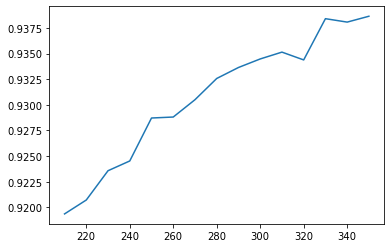

In [8]:
#======【TIME WARNING: 5 mins】======#
import matplotlib.pyplot as plt

score = []
for i in range(350, 200, -10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsval, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()
    score.append(once)
plt.plot(range(350, 200, -10), score)
plt.show()

通过这条曲线，我们可以观察到，随着K值的不断增加，模型的表现不断上升，这说明，K越大越好，数据中所有的特征都是与标签相关的。但是运行这条曲线的时间同样也是非常地长，接下来我们就来介绍一种更好的选择k的方法：看p值选择k。

卡方检验的本质是推测两组数据之间的差异，其检验的**原假设是”两组数据是相互独立的”**。卡方检验返回卡方值和P值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断的边界。从特征工程的角度，我们希望选取卡方值很大，p值小于0.05（拒绝原假设）的特征，即和标签是相关联的特征。而调用SelectKBest之前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值。

In [11]:
chivalue, pvalues_chi = chi2(X_fsval, y)

chivalue
pvalues_chi

# k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

# 然后再基于这个k进行卡方过滤，训练模型
# X_fschi = SelectKBest(chi2, k=填写上面得出的k).fit_transform(X_fsval, y)
# cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

392

可以观察到，所有特征的p值都是0，这说明对于digitrecognizor这个数据集来说，方差验证已经把所有和标签无关的特征都剔除了，或者这个数据集本身就不含与标签无关的特征。在这种情况下，舍弃任何一个特征，都会舍弃对模型有用的信息，而使模型表现下降，因此在我们对计算速度感到满意时，我们不需要使用相关性过滤来过滤我们的数据。如果我们认为运算速度太缓慢，那我们可以酌情删除一些特征，但前提是，我们必须牺牲模型的表现。接下来，我们试试看用其他的相关性过滤方法验证一下我们在这个数据集上的结论。

#### 2.1.2.3 F检验
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含**feature_selection.f_classif**（F检验分类）和**feature_selection.f_regression**（F检验回归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。

和卡方检验一样，这两个类需要和类**SelectKBest**连用，并且我们也可以直接通过输出的统计量来判断我们到底要设置一个什么样的K。需要注意的是，F检验在数据服从正态分布时效果会非常稳定，**因此如果使用F检验过滤，我们会先将数据转换成服从正态分布的方式**。

F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统计量。和卡方过滤一样，我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的，而p值大于0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。以F检验的分类为例，我们继续在数字数据集上来进行特征选择：

In [14]:
from sklearn.feature_selection import f_classif

F, pvalues_f = f_classif(X_fsval, y)

F
pvalues_f

k = F.shape[0] - (pvalues_f > 0.05).sum()

# 然后再基于这个k进行F检验过滤，训练模型
# X_fsF = SelectKBest(f_classif, k=填写上面得出的k).fit_transform(X_fsval, y)
# cross_val_score(RFC(n_estimators=10, random_state=0), X_fsF, y, cv=5).mean()

392

得到的结论和我们用卡方过滤得到的结论一模一样：没有任何特征的p值大于0.01，所有的特征都是和标签相关的，因此我们不需要相关性过滤。

#### 2.1.2.4 互信息法
互信息法是用来捕捉每个特征与标签之间的任意关系（包括**线性和非线性关系**）的过滤方法。和F检验相似，它既可以做回归也可以做分类，并且包含两个类**feature_selection.mutual_info_classif**（互信息分类）和**feature_selection.mutual_info_regression**（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。

互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关。以互信息分类为例的代码如下：

In [17]:
from sklearn.feature_selection import mutual_info_classif as MIC

result = MIC(X_fsval, y)

k = result.shape[0] - sum(result <= 0)

#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

所有特征的互信息量估计都大于0，因此所有特征都与标签相关。

当然了，无论是F检验还是互信息法，大家也都可以使用学习曲线，只是使用统计量的方法会更加高效。当统计量判断已经没有特征可以删除时，无论用学习曲线如何跑，删除特征都只会降低模型的表现。当然了，如果数据量太庞大，模型太复杂，我们还是可以牺牲模型表现来提升模型速度，一切都看具体需求。

### 2.1.3 过滤法总结
到这里我们学习了常用的基于过滤法的特征选择，包括**方差过滤**，基于卡方，F检验和互信息的**相关性过滤**，讲解了各个过滤的原理和面临的问题，以及怎样调这些过滤类的超参数。通常来说，我会建议，先使用方差过滤，然后使用互信息法来捕捉相关性，不过了解各种各样的过滤方式也是必要的。

## 2.2 Embedded嵌入法（不错）
嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。这些权值系数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属性，可以列出各个特征对树的建立的贡献，我们就可以基于这种贡献的评估，找出对模型建立最有用的特征。因此相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版。

然而，嵌入法也不是没有缺点。

过滤法中使用的统计量可以使用统计知识和常识来查找范围（如p值应当低于显著性水平0.05），而嵌入法中使用的权值系数却没有这样的范围可找——我们可以说，权值系数为0的特征对模型丝毫没有作用，但当大量特征都对模型有贡献且贡献不一时，我们就很难去界定一个有效的临界值。这种情况下，模型权值系数就是我们的超参数，我们或许需要学习曲线，或者根据模型本身的某些性质去判断这个超参数的最佳值究竟应该是多少。在本文中演示随机森林和决策树模型的嵌入法。另外，嵌入法引入了算法来挑选特征，因此其计算速度也会和应用的算法有很大的关系。如果采用计算量很大，计算缓慢的算法，嵌入法本身也会非常耗时耗力。并且，在选择完毕之后，我们还是需要自己来评估模型。

### feature_selection.SelectFromModel
SelectFromModel是一个元变换器，可以与任何在拟合后具有coef_，feature_importances_属性或参数中可选惩罚项的评估器一起使用（比如随机森林和树模型就具有属性feature_importances_，逻辑回归就带有l1和l2惩罚项，线性支持向量机也支持l2惩罚项）。

对于有feature_importances_的模型来说，若重要性低于提供的阈值参数，则认为这些特征不重要并被移除。feature_importances_的取值范围是[0,1]，如果设置阈值很小，比如0.001，就可以删除那些对标签预测完全没贡献的特征。如果设置得很接近1，可能只有一两个特征能够被留下。

参数有：estimator、threshold（特征重要性的阈值，重要性低于这个阈值的特征都将被删除）等。我们重点要考虑的是这两个参数。在这里，我们使用随机森林为例，则需要学习曲线来帮助我们寻找最佳特征值。

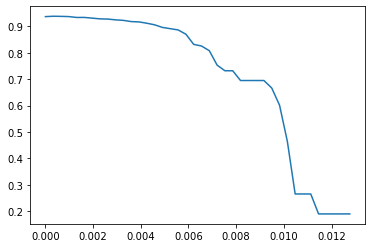

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10, random_state=0)
X_embedded = SelectFromModel(RFC_, threshold=0.005).fit_transform(X, y)  # 返回筛选后的特征
#在这里我只想取出来有限的特征。0.005这个阈值对于有780多个特征的数据来说，是非常高的阈值，因为平均每个特征只能够分到大约0.001的feature_importances_
X_embedded.shape  # 47
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

#======【TIME WARNING：10 mins】======#
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(X, y).feature_importances_

threshold = np.linspace(0, (RFC_.fit(X, y).feature_importances_).max(), 40)

score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean()
    score.append(once)
plt.plot(threshold, score)
plt.show()

从图像上来看，随着阈值越来越高，模型的效果逐渐变差，被删除的特征越来越多，信息损失也逐渐变大。但是在0.001之前，模型的效果都可以维持在0.93以上，因此我们可以从中挑选一个数值来验证一下模型的效果。

In [23]:
X_embedded = SelectFromModel(RFC_, threshold=0.00067).fit_transform(X, y)
X_embedded.shape  # (42000, 324)
cross_val_score(RFC_, X_embedded, y, cv=5).mean()

0.9391190476190475

可以看出，特征个数瞬间缩小到324，这比我们在方差过滤的时候选择中位数过滤出来的结果392列要小，并且交叉验证分数0.9391高于方差过滤后的结果0.9390，这是由于嵌入法比方差过滤更具体到模型的表现的缘故，换一个算法，使用同样的阈值，效果可能就没有这么好了。和其他调参一样，我们可以在第一条学习曲线后选定一个范围，使用细化的学习曲线来找到最佳值：

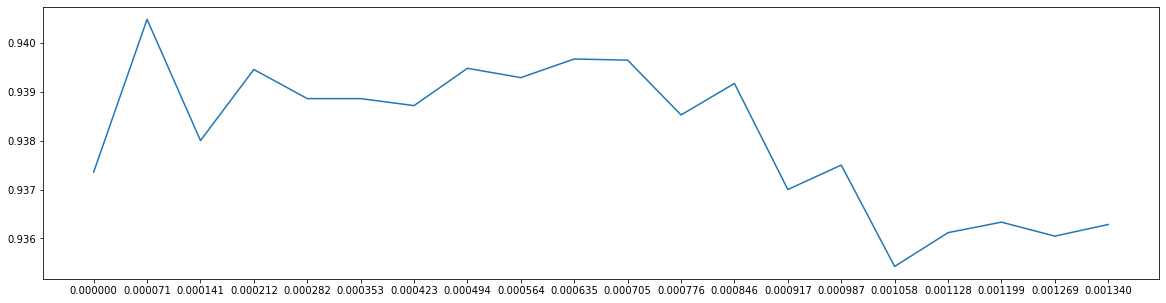

In [24]:
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0, 0.00134, 20):
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20, 5])
plt.plot(np.linspace(0, 0.00134, 20), score2)
plt.xticks(np.linspace(0, 0.00134, 20))
plt.show()

查看结果，果然0.00067并不是最高点，真正的最高点0.000071已经将模型效果提升到了94%以上。我们使用0.000071来跑一跑我们的SelectFromModel：

In [35]:
X_embedded = SelectFromModel(RFC_, threshold=0.000071).fit_transform(X, y)
X_embedded.shape  # (42000, 461)

#=====【TIME WARNING：2 min】=====#
cross_val_score(RFC(n_estimators=100, random_state=0), X_embedded, y, cv=5).mean()

0.964642857142857

可见模型的表现比没有筛选之前更高，已经完全可以和计算一次半小时的KNN相匹敌（KNN的准确率是0.966000），接下来再对随机森林进行调参，准确率应该还可以再升高不少。可见，在嵌入法下，我们很容易就能够实现**特征选择的目标：减少计算量，提升模型表现**。

因此，比起要思考很多统计量的过滤法来说，**嵌入法可能是更有效**的一种方法。然而，在算法本身很复杂的时候，过滤法的计算远远比嵌入法要快，所以**大型数据中，我们还是会优先考虑过滤法**。

## 2.3 Wrapper包装法
包装法也是一个特征选择和算法训练同时进行的方法，与嵌入法十分相似，它也是依赖于算法自身的选择，比如coef_属性或feature_importances_属性来完成特征选择。但不同的是，我们往往使用一个**目标函数**作为黑盒来帮助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。包装法在初始特征集上训练评估器，并且通过coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。区别于过滤法和嵌入法的一次训练解决所有问题，包装法要使用特征子集进行多次训练，因此它所需要的**计算成本是最高**的。

我们的目标函数是专业的数据挖掘算法。这些数据挖掘算法的核心功能就是选取最佳特征子集。最典型的目标函数是递归特征消除法（Recursivefeatureelimination,简写为RFE）。它是一种贪婪的优化算法，旨在找到性能最佳的特征子集。它反复创建模型，并在每次迭代时保留最佳特征或剔除最差特征，下一次迭代时，它会使用上一次建模中没有被选中的特征来构建下一个模型，直到所有特征都耗尽为止。然后，它根据自己保留或剔除特征的顺序来对特征进行排名，最终选出一个最佳子集。包装法的效果是所有特征选择方法中最利于提升模型表现的，它可以使用很少的特征达到很优秀的效果。除此之外，在特征数目相同时，包装法和嵌入法的效果能够匹敌，不过它比嵌入法算得更见缓慢，所以也不适用于太大型的数据。相比之下，包装法是最能保证模型效果的特征选择方法。

### feature_selection.RFE
参数**estimator**是需要填写的实例化后的评估器，**n_features_to_select**是想要选择的特征个数，**step**表示每次迭代中希望移除的特征个数。除此之外，RFE类有两个很重要的属性，**.support_**：返回所有的特征的是否最后被选中的布尔矩阵，**以及.ranking_**:返回特征的按数次迭代中综合重要性的排名。类**feature_selection.RFECV**会在交叉验证循环中执行RFE以找到最佳数量的特征，增加参数cv，其他用法都和RFE一模一样。

In [38]:
from sklearn.feature_selection import RFE

RFC_ = RFC(n_estimators=10, random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

selector.support_.sum()
selector.ranking_

X_wrapper = selector.transform(X)
cross_val_score(RFC_, X_wrapper, y, cv=5).mean()

0.9379761904761905

我们也可以对包装法画学习曲线：

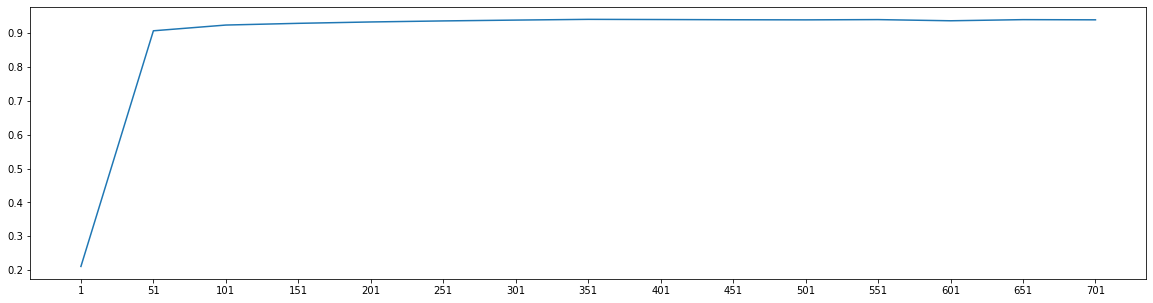

In [39]:
#======【TIME WARNING: 15 mins】======#

score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()

明显能够看出，在包装法下面，应用50个特征时，模型的表现就已经达到了90%以上，比嵌入法和过滤法都高效很多。我们可以放大图像，寻找模型变得非常稳定的点来画进一步的学习曲线（就像我们在嵌入法中做的那样）。**如果我们此时追求的是最大化降低模型的运行时间**，我们甚至可以**直接选择50**作为特征的数目，这是一个在缩减了94%的特征的基础上，还能保证模型表现在90%以上的特征组合，不可谓不高效。

同时，我们提到过，在特征数目相同时，包装法能够在效果上匹敌嵌入法。试试看如果我们也使用340作为特征数目，运行一下，可以感受一下包装法和嵌入法哪一个的速度更加快。由于包装法效果和嵌入法相差不多，在更小的范围内使用学习曲线，我们也可以将包装法的效果调得很好，大家可以去试试看。

## 2.4 特征选择总结
以上就是除降维之外的所有特征选择的方法。这些方法的代码都不难，但是每种方法的原理都不同，并且都涉及到不同调整方法的超参数。**经验来说，过滤法更快速，但更粗糙。包装法和嵌入法更精确**，比较适合具体到算法去调整，但计算量比较大，运行时间长。当**数据量很大**的时候，优先使用**方差过滤和互信息法**调整，再上其他特征选择方法。使用**逻辑回归**时，优先使用**嵌入法**。使用**支持向量机**时，优先使用**包装法**。迷茫的时候，从过滤法走起，看具体数据具体分析。

其实特征选择只是特征工程中的第一步。真正的高手，往往使用特征创造或特征提取来寻找高级特征。在Kaggle之类的算法竞赛中，很多高分团队都是在高级特征上做文章，而这是比调参和特征选择更难的，提升算法表现的高深方法。特征工程非常深奥，虽然我们日常可能用到不多，但其实它非常美妙。若大家感兴趣，也可以自己去网上搜一搜，多读多看多试多想，技术逐渐会成为你的囊中之物

**文章参考于该up主：https://space.bilibili.com/2932207**